## COM410 - Aprendizado de Máquinas - Semana 4
### Exercício de apoio: Usando SVM para classificar tipos de arrozes


O conjunto de dados deste exercício contém características de duas espécies de arroz. Use SVM para classificar as espécies de arroz. Faça os seguintes passos: 

1. Crie o classificador usando todos os atributos (exceto **id** e **Class**).
2. Separe os dados em treinamento e teste.
3. Reduza a escala dos valores dos atributos para agilizar a execução do código.
4. Use a função de kernel polinomial.
5. Verifique a acurácia do classificador.
6. Crie novamente o classificador, agora usando dois atributos (por exemplo, **Area** e **MajorAxisLength**) usando as funções kernel linear, polinomial e sigmoidal.
7. Repita os passos 2 e 3.
8. Verifique a acurácia dos classificadores.
9. Plote os resultados obtidos.
10. Qual foi o melhor desempenho que você obteve?

O conjunto de dados contém os atributos descritos a seguir, e está disponível no link abaixo: 

https://raw.githubusercontent.com/higoramario/univesp-com410-aprendizado-de-maquinas/main/rice-classification.csv

**Atributos**: 

* **id**: identificador do objeto

* **Area**: área do grão

* **MajorAxisLength**: tamanho do eixo principal

* **MinorAxisLength**: tamanho do eixo menor

* **Eccentricity**: excentricidade

* **ConvexArea**: área convexa

* **EquivDiameter**: diâmetro equivalente

* **Extent**: extensão

* **Perimeter**: perímetro

* **Roundness**: redondeza

* **AspectRation**: razão de aspecto

* **Class (atributo alvo)**: tipo de arroz (1 - Jasmine, 0 - Gonen)

**Observações**: 

* Se necessário, use o código apresentado na videoaula 10 (Aplicação do algoritmo SVM) desta semana. Lá, há exemplos de como reduzir a escala de dados e de como plotar os resultados das SVMs. 


* O dataset deste exercício é baseado no dataset Rice type classification, que está em:   

 * https://www.kaggle.com/datasets/mssmartypants/rice-type-classification

1. Nesta atividade, usaremos as bibliotecas **scikit-learn**, **pandas**, **numpy** e **matplotlib**. Importe as bibliotecas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from google.colab import files

plt.rcParams['figure.figsize']=[15,10]

2. Importe a base de dados direto da URL e verifique as primeiras linhas. O arquivo contém 18185 registros. 

In [2]:
url = 'https://raw.githubusercontent.com/higoramario/univesp-com410-aprendizado-de-maquinas/main/rice-classification.csv'
arroz = pd.read_csv(url, sep=',')
arroz.head(10)

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
5,6,2990,77.417073,50.954344,0.752861,3080,61.700780,0.584898,216.930,0.798439,1.519342,1
6,7,3556,84.323564,55.413061,0.753762,3636,67.287739,0.750211,227.007,0.867148,1.521727,1
7,8,3788,86.952411,56.444769,0.760664,3866,69.448048,0.800676,235.476,0.858473,1.540487,1
8,9,2629,74.133114,48.074144,0.761228,2790,57.856260,0.640595,207.325,0.768594,1.542058,1
9,10,5719,106.721142,68.977700,0.763053,5819,85.332625,0.754983,281.839,0.904748,1.547183,1


3. Vamos ver a distribuição do atributo classe.

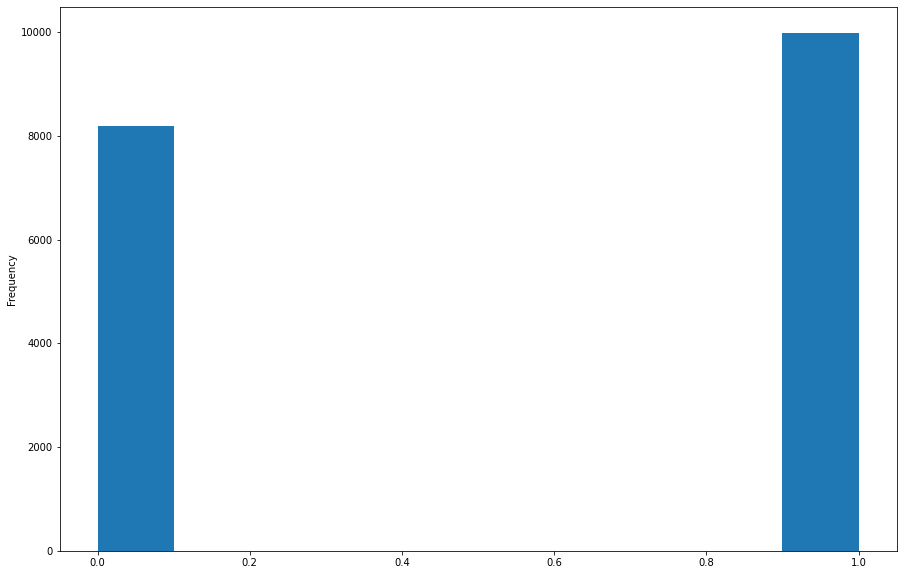

In [3]:
arroz['Class'].plot.hist()
plt.show()

4. Selecionando todos os atributos

In [4]:
atributos_todos = arroz[['Area','MajorAxisLength','MinorAxisLength','Eccentricity','ConvexArea','EquivDiameter','Extent','Perimeter','Roundness','AspectRation']]
classes = arroz['Class']

5. Agora, dividimos os os dados entre treinamento (90%) e teste (10%).

In [5]:
arroz_treino_todos, arroz_teste_todos, classes_treino_todos, classes_teste_todos = train_test_split(atributos_todos, classes, test_size = 0.1)

6. Escalando os dados para acelerar a execução do treinamento do modelo e da geração do gráfico de visualização dos resultados.

In [6]:
scaler = StandardScaler()
arroz_treino_todos = scaler.fit_transform(arroz_treino_todos)
arroz_teste_todos = scaler.transform(arroz_teste_todos)

7. Treinando o modelo para gerar o classificador usando a função kernel polinomial.

Os seguintes parâmetros de funções de kernel podem ser usados para aprimorar o modelo:

**C**: determina se a margem será mais ajustada (C grande) ou mais larga (C pequeno)

**gamma**: parâmetro de ajuste para as funções polinomial e sigmoidal

**coef0**: parâmetro kappa, constante usada nas funções polinomial e sigmoidal

**degree**: grau da função polinomial

In [7]:
SVM_polinomial_todos = SVC(kernel = 'poly', degree = 3, gamma = 'scale', C = 1.0, coef0 = 2)
SVM_polinomial_todos.fit(arroz_treino_todos, classes_treino_todos)

SVC(coef0=2, kernel='poly')

8. Verificando a acurácia de classificação, cujo valor pode variar dependendo do conjunto usado no treinamento.

In [8]:
predicao_todos = SVM_polinomial_todos.predict(arroz_teste_todos)
acuracia_todos = accuracy_score(classes_teste_todos,predicao_todos)
print('Acurácia de classificação com os todos atributos: {}'.format(round(acuracia_todos,3)*100)+'%')

Acurácia de classificação com os todos atributos: 99.1%


9. Criando um novo conjunto com apenas dois atributos para plotar os resultados.

In [9]:
atributos = arroz[['Area','MajorAxisLength']]
classes = arroz['Class']

10. Separando o conjunto em treinamento e teste.

In [10]:
arroz_treino, arroz_teste, classes_treino, classes_teste = train_test_split(atributos, classes, test_size = 0.1)

11. Escalando os dados para acelerar a execução do treinamento do modelo e da geração do gráfico de visualização dos resultados.

In [11]:
scaler = StandardScaler()
arroz_treino = scaler.fit_transform(arroz_treino)
arroz_teste = scaler.transform(arroz_teste)

12. Gerando o classificador linear.

In [12]:
SVM_linear = SVC(kernel = 'linear', C = 0.2)
SVM_linear.fit(arroz_treino, classes_treino)

SVC(C=0.2, kernel='linear')

13. Verificando a acurácia de classificação.

In [13]:
predicao_linear = SVM_linear.predict(arroz_teste)
acuracia_linear = accuracy_score(classes_teste,predicao_linear)
print('Acurácia de classificação da SVM linear com dois atributos: {}'.format(round(acuracia_linear,3)*100)+'%')

Acurácia de classificação da SVM linear com dois atributos: 98.6%


14. Vamos plotar o resultado olhando como o modelo classifica o conjunto de testes. Para isso, vamos criar uma função que usa as funções **meshgrid** do numpy, que cria um grid retangular, e **contourf** do matplotlib, que permite criar linhas e preencher áreas com cores.

In [14]:
#função que recebe os atributos e classes do conjunto de testes, o classificador SVM e plota os resultados
def visualizarSVM(atributos_t,classes_t,classificador):
  atributos, classes = atributos_t, classes_t

  ano, salario = np.meshgrid(np.arange(start = atributos[:, 0].min() - 1, stop = atributos[:, 0].max() + 1, step = 0.01),
                      np.arange(start = atributos[:, 1].min() - 1, stop = atributos[:, 1].max() + 1, step = 0.01))

  plt.contourf(ano, salario, classificador.predict(np.array([ano.ravel(), salario.ravel()]).T).reshape(ano.shape),
              alpha = 0.75, cmap = ListedColormap(('red', 'green')))

  plt.xlim(ano.min(), ano.max())
  plt.ylim(salario.min(), salario.max())

  for i, j in enumerate(np.unique(classes)):
      plt.scatter(atributos[classes == j, 0], atributos[classes == j, 1],
                  color = ListedColormap(('red', 'green'))(i), label = j)

  plt.title('Classificação SVM')
  plt.xlabel('Ano')
  plt.ylabel('Salário estimado')
  plt.legend()
  plt.show()

15. Vamos plotar o classificador linear.

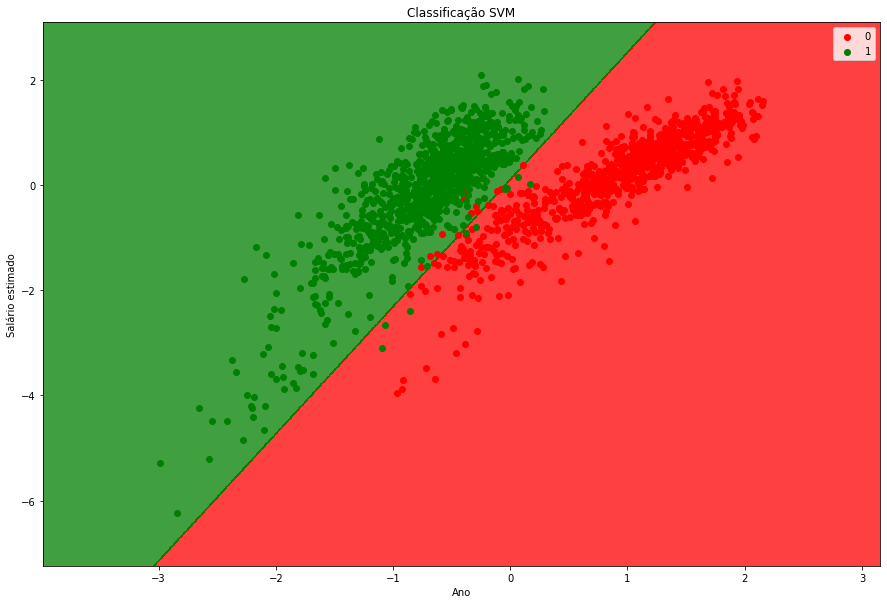

In [15]:
visualizarSVM(arroz_teste, classes_teste, SVM_linear)

16. Agora vamos treinar o modelo para gerar o classificador usando a função kernel polinomial.

In [16]:
SVM_polinomial = SVC(kernel = 'poly', degree = 3, gamma = 'scale', C = 1.0, coef0 = 2)
SVM_polinomial.fit(arroz_treino, classes_treino)

SVC(coef0=2, kernel='poly')

17. Verificando a acurácia de classificação da SVM polinomial

In [17]:
predicao_poli = SVM_polinomial.predict(arroz_teste)
acuracia_poli = accuracy_score(classes_teste,predicao_poli)
print('Acurácia de classificação da SVM polinomial com dois atributos: {}'.format(round(acuracia_poli,3)*100)+'%')

Acurácia de classificação da SVM polinomial com dois atributos: 98.8%


18. Vamos plotar o classificador que usa a função polinomial

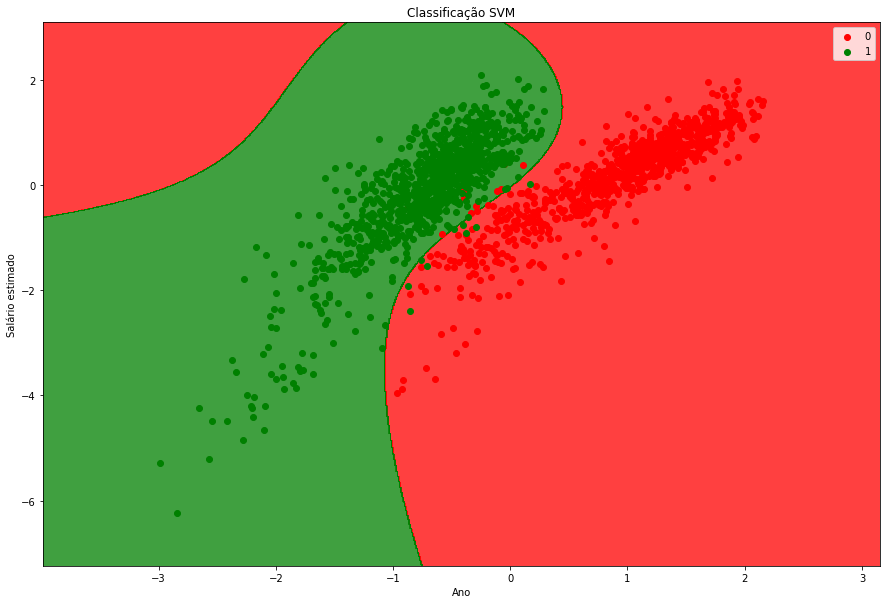

In [18]:
visualizarSVM(arroz_teste, classes_teste, SVM_polinomial)

19. Agora vamos treinar o modelo para gerar o classificador usando a função kernel sigmoidal.

In [19]:
SVM_sigmoidal = SVC(kernel = 'sigmoid', gamma = 'scale', C = 2, coef0 = 2)
SVM_sigmoidal.fit(arroz_treino, classes_treino)

SVC(C=2, coef0=2, kernel='sigmoid')

20. Verificando a acurácia de classificação da SVM sigmoidal

In [20]:
predicao_sigmoidal = SVM_sigmoidal.predict(arroz_teste)
acuracia_sigmoidal = accuracy_score(classes_teste,predicao_sigmoidal)
print('Acurácia de classificação da SVM sigmoidal com dois atributos: {}'.format(round(acuracia_sigmoidal,3)*100)+'%')

Acurácia de classificação da SVM sigmoidal com dois atributos: 74.9%


21. Vamos plotar o classificador que usa a função sigmoidal

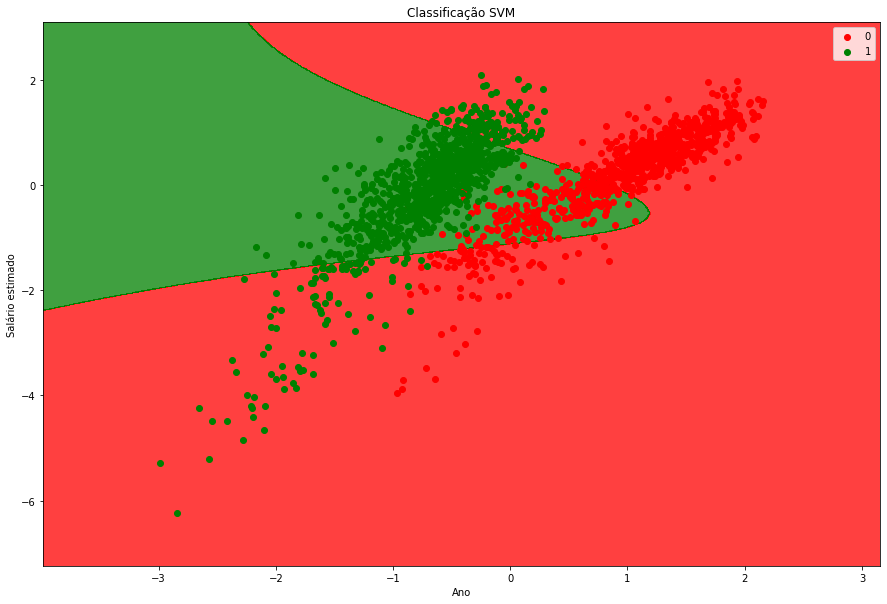

In [21]:
visualizarSVM(arroz_teste, classes_teste, SVM_sigmoidal)

Os resultados mostram que os classificadores gerados possuem bom desempenho para esse conjunto de dados, mesmo quando usamos apenas dois dos atributos. A função kernel sigmoidal possui uma acurácia um pouco abaixo das demais, e também demora mais para ser executada.

Experimente ver os resultados usando alterando as funções kernel e seus parâmetros para ver se consegue melhores resultados.

**Versões das bibliotecas**

Esse tutorial está usando as seguintes versões de bibliotecas: 

matplotlib==3.2.2

numpy==1.21.6

pandas==1.3.5

scikit-learn==1.0.2